<a href="https://colab.research.google.com/github/MoraceA/Student-Mental-Health/blob/main/Student_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ariana Morace Final Project: Student Mental Health

 The data below shows a pool of 102 students, and categorical information such as their 

* age 
* gender
* course
* year of study
* current GPA
* marital status

Most immportantly, the data correlates all of these factors into whether students have depression or anxiety.


There are two questions that we will explore in this data set, which include:

1. Which college courses contribute the most to depression?

2. Which college courses contribute the most to anxiety?


My null hypothesis for my questions is students who take STEM courses have higher chances of having depression and anxiety because they are more stressed. The stem classes in this data include Engeineering, BCS, Mathematics, and Biomedical Sciences.

My alternative hypothesis students who are not involved in STEM courses have higher chances of having depression and anxiety. These classes include Laws, Human Resources, Psychology, Business, Accounting, and Communications.

In this research, we will examine which courses are linked to higher rates of depression and anxiety. 

In [ ]:
#importing data
#https://raw.githubusercontent.com/MoraceA/Student-Mental-Health/main/Student%20Mental%20health.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MoraceA/Student-Mental-Health/main/Student%20Mental%20health.csv")
#shows the beginning of the data
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


We must test for categorical and numerical data. In analysis, all of the data is categorical except for the variable "Age". Age is numerical because it is a float.

In [ ]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

We must test for nulls and missing data. By doing so, we will use the df.isnull() function.

In [ ]:
#Here we will check for nulls

df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
#Here we will check for any missing data
df.isna().sum()


Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In analysis, there is only one piece of missing data found in the age category. As a result, we will impute data to substitute the missing value.

In [ ]:
#here we will check for unique values


df.nunique()


Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In this section, we are finding the average age to substitute the one missing age value. The average is 20, therefore we will impute 20 years old into the missing value

In [ ]:
#Impute data: correcting the data.Since we only have one piece of data missing in the age category, we will replace the missing data with a substituted value. By doing so, we will start by checking for the average age, and plug in the average age into the missing data.
age_mean = df['Age'].mean()
age_mean
#The average is 20 years old.


20.53

We impute the missing value by plugging age_mean into the df.fillna() function. 

In [ ]:
#Here we will substitute 20 years old into the missing data
df['Age'].fillna(age_mean,inplace=True)

We will double check that our code worked to ensure that there are no longer any missing values. In analysis, there is no missing data now.

In [ ]:
#Now we will check again for any missing data
df.isna().sum()
#There is now no longer any missing data

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

We will gather statistics from the data. In analysis, the count reveals that data from 101 students were collected because the count is 101. The data was collected from students ages 18 to 24 because the minimum was 18 and the maximum was 24.

In [ ]:
#Now we will gather statistics from the data
df.describe()

,Age
count,101.000000
mean,20.530000
std,2.483767
min,18.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,24.000000


We will first generate a graph to examine how many students suffer from anxiety. In analysis, less students suffer from anxiety and more students DO NOT suffer from anxiety.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Number of Students With Anxiety')

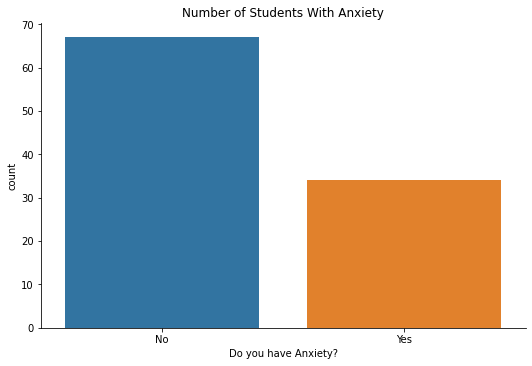

In [ ]:
sns.factorplot(x='Do you have Anxiety?', data=df, kind='count', size = 5, aspect=1.5)
plt.title('Number of Students With Anxiety')


We will then generate a graph to examine how many students suffer from depression. In analysis, there are less students who suffer from depression than students who do not.



Of the 101 students, majority of the students DO NOT suffer from depression or anxiety.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Number of Students With Depression')

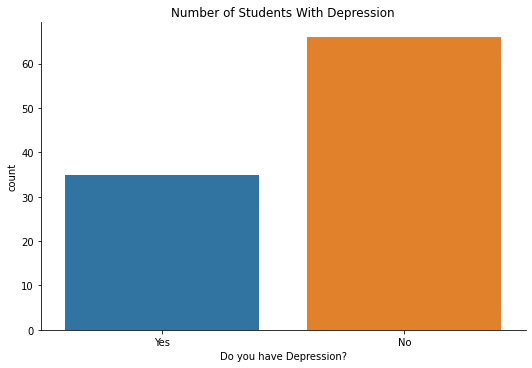

In [ ]:
sns.factorplot(x='Do you have Depression?', data=df, kind='count', size = 5, aspect=1.5)
plt.title('Number of Students With Depression')

We will utizile a graph to analyze the most common courses students are taking. In analysis, majority of the students are taking BCS and Engineering courses

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


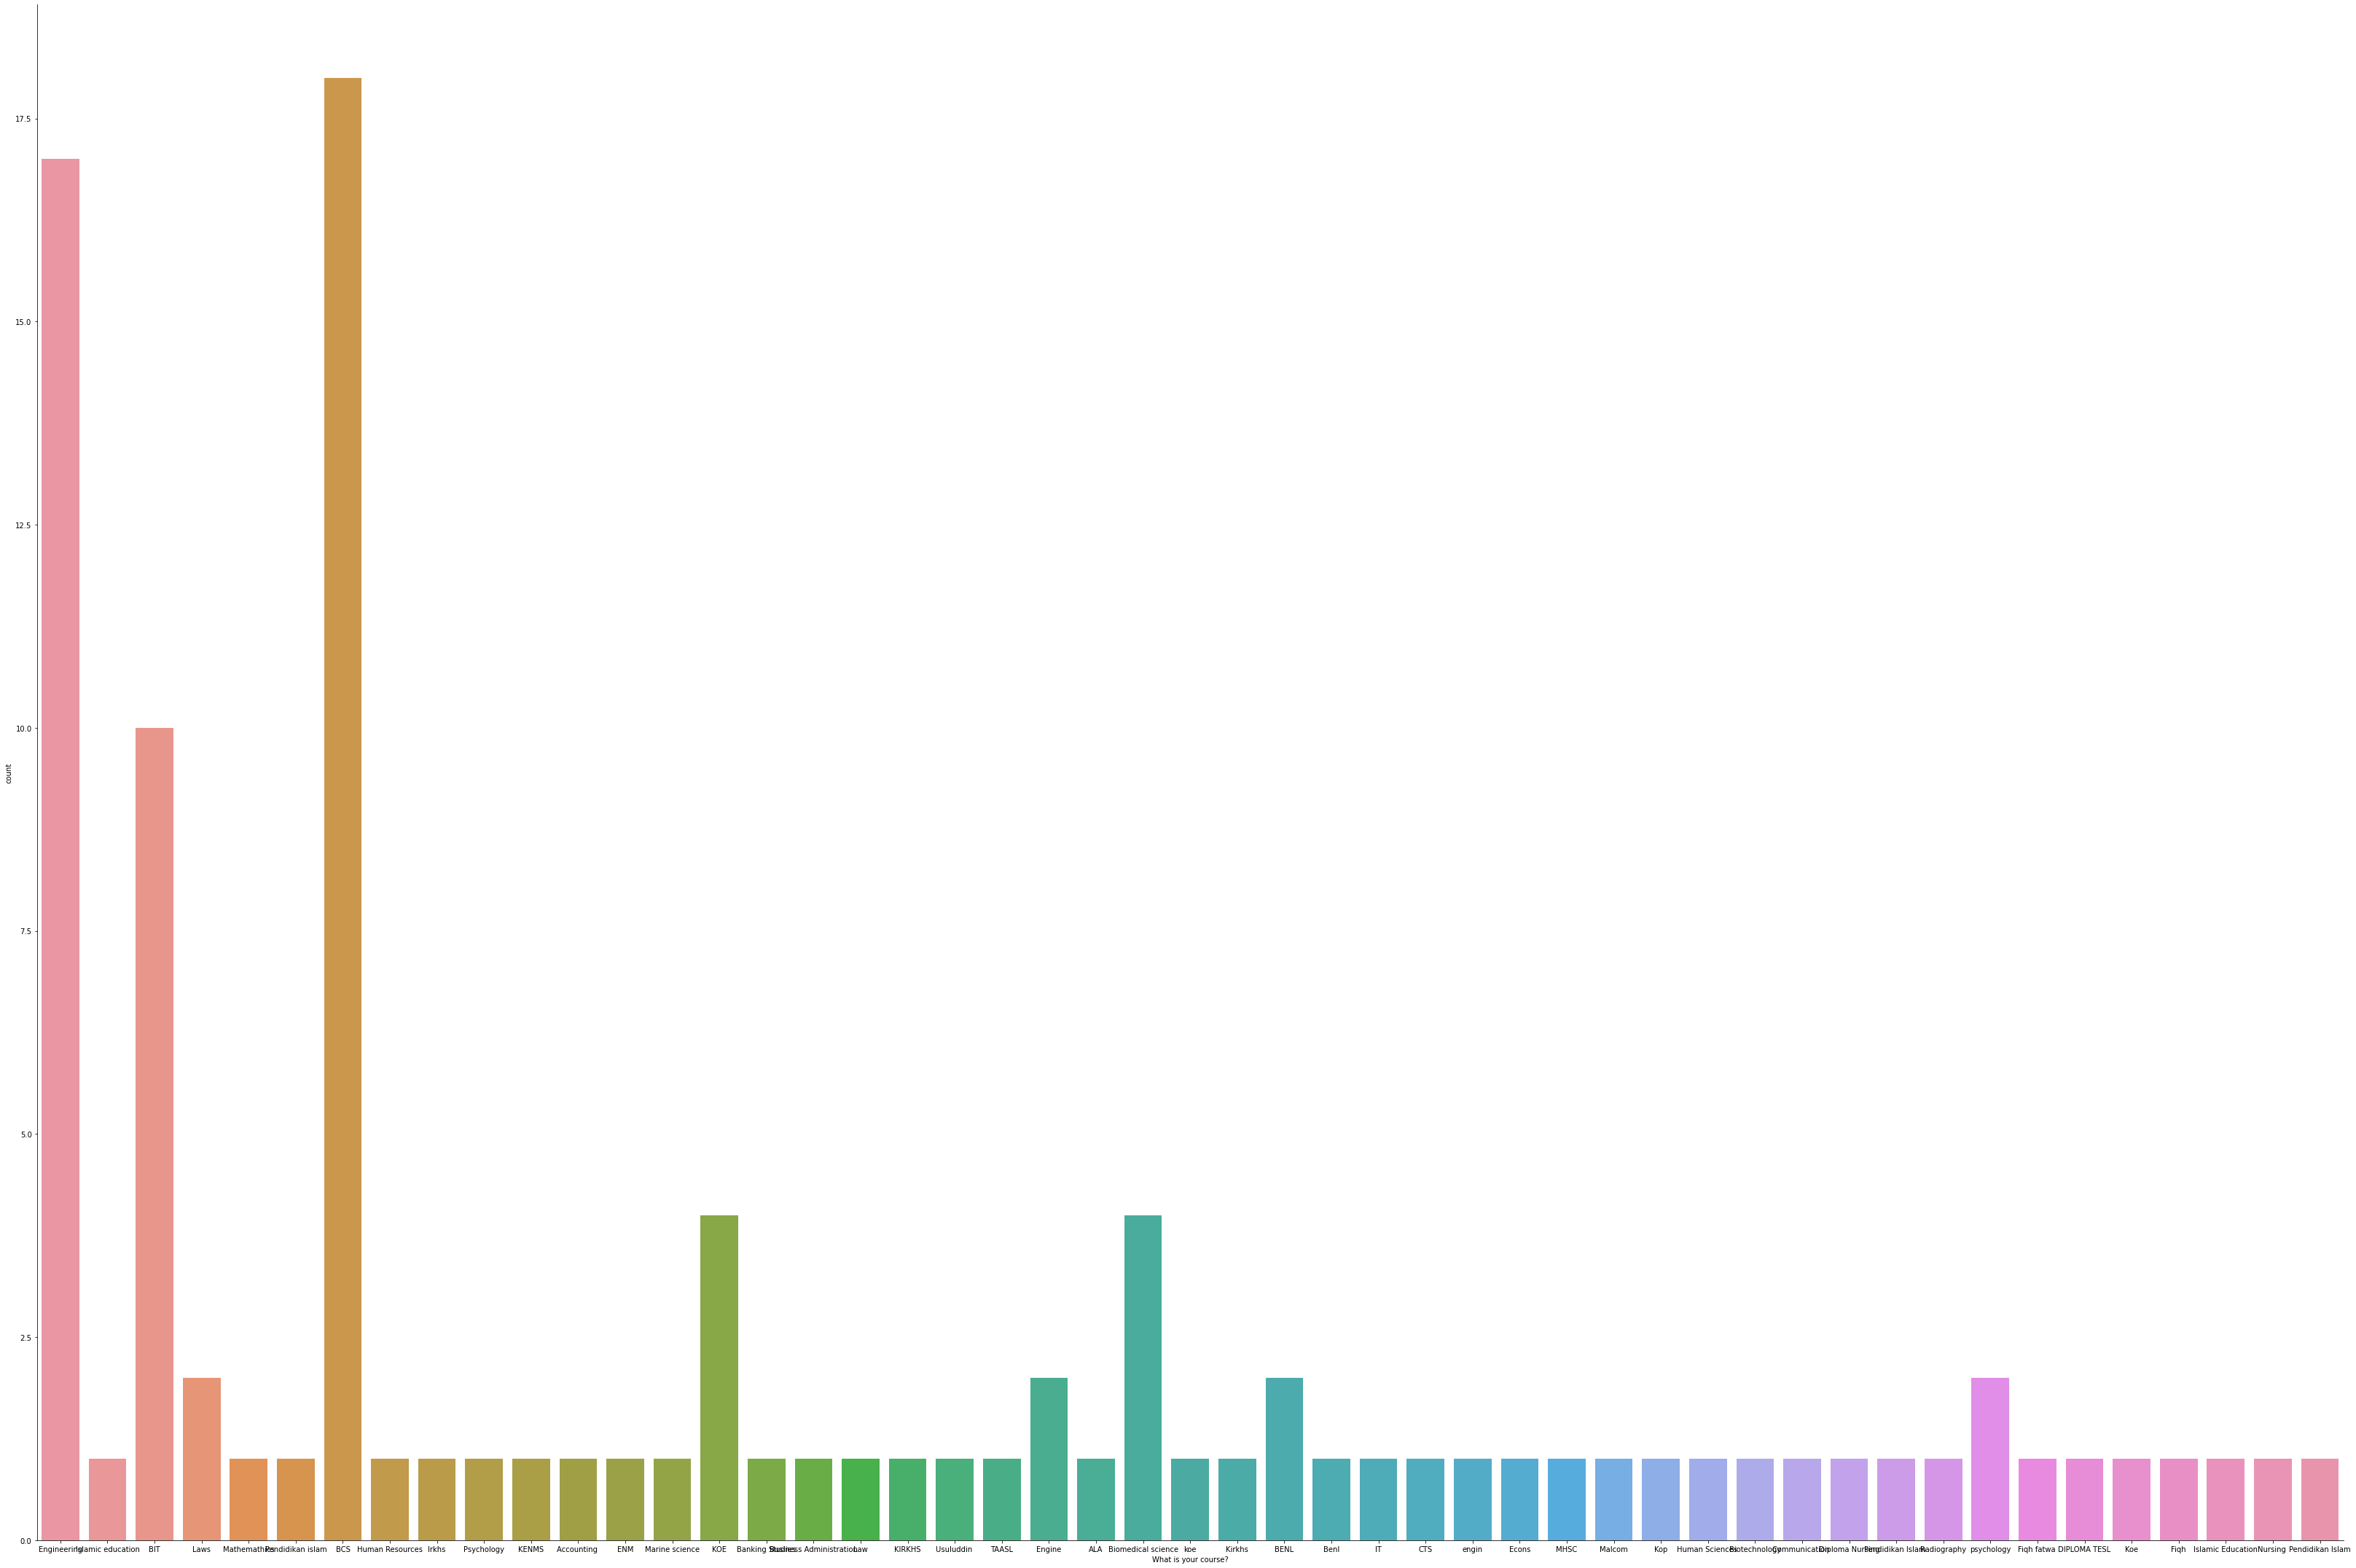

In [ ]:
sns.factorplot(x='What is your course?', data=df, kind='count', size = 30, aspect=1.5)

Here I counted manually how many students were suffering from depression in STEM courses and Humanities courses. The STEM courses included Engineering, Mathematics, BCS, and Biomedical Sciences. The Humanities courses included Laws, Human Resources, Pyschology and Other. Other refers to the total students who are depressed in business, accounting, and communications.


  I then created a list comparing the number of students who were suffering from depression in each class. In analysis, there are more students suffering from depression in the STEM courses because Engineering has the most amount of depressed students, whereas BCS has the second most amount. On the other hand, the Humanities courses have a siginificantally lower amount of students who are suffering depression where the most amount of students who are suffering is 2.





  A total of 12 students are suffering from depression in the STEM courses whereas a total of 4 students are suffering from depression in the humanities courses. 


  In analysis, this shows that STEM students are three times more likely to suffer from depression than humanities students.

Text(0.5, 1.0, 'Depression in Courses')

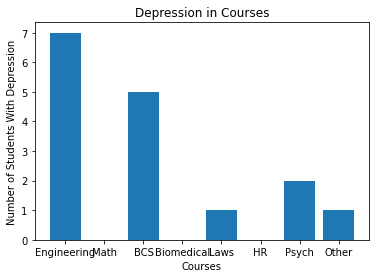

In [ ]:
#Count of depression in science-related courses
#Other is a mix of business, accounting, and communications
x =["Engineering", "Math", "BCS", "Biomedical", "Laws", "HR", "Psych", "Other"]
y = [7,0,5,0,1,0,2,1]
plt.bar(x,y)
plt.xlabel("Courses")
plt.ylabel("Number of Students With Depression")
plt.title("Depression in Courses")





Here I counted manually how many students were suffering from anxiety in STEM and Humanities courses. I developed a list comparing the number of students who suffered from anxiety and the classes they are taking. In analysis, more students are suffering from anxiety in STEM courses here BCS has the most amount of students who are suffering from anxiety and Engineering has the second. On the other hand, the humanities classes has much less students suffering from anxiety. 


A total of 10 students are suffering from anxiety in the STEM courses whereas 3 students are suffering from anxiety in the Humanities courses.

Text(0.5, 1.0, 'Anxiety in Courses')

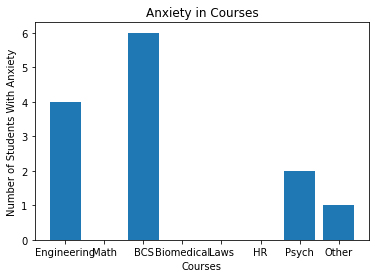

In [ ]:
#count of anxiety in STEM courses
#Other is a mix of business, accounting, and communications
x =["Engineering", "Math", "BCS", "Biomedical", "Laws", "HR", "Psych","Other"]
y = [4,0,6,0,0,0,2,1]
plt.bar(x,y)
plt.xlabel("Courses")
plt.ylabel("Number of Students With Anxiety")
plt.title("Anxiety in Courses")

Connecting back to my questions, the college course that contributes the most to depression is Engineering. The college course that contributes the most to anxiety is BCS(Computer Systems).


All in all, my null hypothesis was correct because I hypothesized that students who took stem courses had higher chances of having depression and anxiety. According to my research, students in the STEM courses were three times more likely to have depression and anxiety than students in the Humanities courses.

